# nlp100 chapter6

Try:http://www.cl.ecei.tohoku.ac.jp/nlp100

In [1]:
%matplotlib inline
import os
import sys
import re
import MeCab
import ngram
import numpy as np
import pandas as pd
import pydot
from PIL import Image
import itertools
import CaboCha
import matplotlib.pyplot as plt
os.chdir('../../nnnnishi/nlp-100knock')

## 50. 文区切り

In [2]:
with open('data/nlp.txt') as reader:
    punctuation = ''
    count = 0
    for line in reader:
        count += 1
        for c in line:
            punctuation = punctuation + c
            if len(punctuation) > 3:
                punctuation = punctuation[1:4]
                if re.search(r'\.\s[A-Z]|\;\s[A-Z]|\:\s[A-Z]|\?\s[A-Z]|\!\s[A-Z]'
                             , punctuation):
                    print('')
            if c != '\n':
                print(c, end='')
        print('')
        if count > 7: break

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. 
As such, NLP is related to the area of humani-computer interaction. 
Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods. 
In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.


## 51. 単語の切り出し

In [3]:
with open('data/nlp_words.txt', 'w') as writer:
    with open('data/nlp.txt') as reader:
        punctuation = ''
        count = 0
        for line in reader:
            count += 1
            for c in line:
                punctuation = punctuation + c
                if len(punctuation) > 3:
                    punctuation = punctuation[1:4]
                    if re.search(r'\.\s[A-Z]|\;\s[A-Z]|\:\s[A-Z]|\?\s[A-Z]|\!\s[A-Z]'
                                 , punctuation):
                        print('')
                if c != '\n' and ';' and '.' and ',' and ':' and '?' and '!':
                    if c == ' ':
                        print(c)
                        writer.write(c+'\n')
                    else:
                        print(c, end='')
                        writer.write(c)
            print('')
            writer.write('\n')
            if count > 7: break

Natural 
language 
processing
From 
Wikipedia, 
the 
free 
encyclopedia

Natural 
language 
processing 
(NLP) 
is 
a 
field 
of 
computer 
science, 
artificial 
intelligence, 
and 
linguistics 
concerned 
with 
the 
interactions 
between 
computers 
and 
human 
(natural) 
languages. 

As 
such, 
NLP 
is 
related 
to 
the 
area 
of 
humani-computer 
interaction. 

Many 
challenges 
in 
NLP 
involve 
natural 
language 
understanding, 
that 
is, 
enabling 
computers 
to 
derive 
meaning 
from 
human 
or 
natural 
language 
input, 
and 
others 
involve 
natural 
language 
generation.

History

The 
history 
of 
NLP 
generally 
starts 
in 
the 
1950s, 
although 
work 
can 
be 
found 
from 
earlier 
periods. 

In 
1950, 
Alan 
Turing 
published 
an 
article 
titled 
"Computing 
Machinery 
and 
Intelligence" 
which 
proposed 
what 
is 
now 
called 
the 
Turing 
test 
as 
a 
criterion 
of 
intelligence.


## 52. ステミング

In [4]:
from stemming.porter2 import stem

count = 0
with open('data/nlp_words.txt') as reader:
    for line in reader:
        word = line.rstrip()
        print(word+'\t'+stem(word))
        count += 1
        if count > 10:
            break

Natural	Natur
language	languag
processing	process
From	From
Wikipedia,	Wikipedia,
the	the
free	free
encyclopedia	encyclopedia
	
Natural	Natur
language	languag


## 53. Tokenization

In [5]:
w = re.compile(r"<word>(\w+)</word>")

count = 0
with open('data/nlp.txt.xml', 'r') as reader:
    for line in reader:
        word = w.search(line.strip())
        if word:
            print(word.group(1))
            count += 1
        if count > 10:
            break

Natural
language
processing
From
Wikipedia
the
free
encyclopedia
Natural
language
processing


## 54. 品詞タグ付け

In [15]:
w = re.compile(r"<word>(\w+)</word>")
l = re.compile(r"<lemma>(\w+)</lemma>")
p = re.compile(r"<POS>(\w+)</POS>")

count = 0
with open('data/nlp.txt.xml', 'r') as reader:
    for line in reader:
        word = w.search(line.strip())
        lemma = l.search(line.strip())
        pos = p.search(line.strip())
        if word:
            print(word.group(1), end='\t')
        if lemma:
            print(lemma.group(1), end='\t')
        if pos:
            print(pos.group(1))
            count += 1
        if count > 10:
            break

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ
language	language	NN
processing	processing	NN


## 55. 固有表現抽出

In [20]:
w = re.compile(r"<word>(\w+)</word>")
n = re.compile(r"<NER>PERSON</NER>")

count = 0
with open('data/nlp.txt.xml', 'r') as reader:
    for line in reader:
        word = w.search(line.strip())
        if word:
            word_tmp = word
        nel = n.search(line.strip())
        if nel:
            print(word_tmp.group(1))
            count += 1
        if count > 10:
            break

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert


## 56. 共参照解析

In [69]:
count = 0
rm = ''
with open('data/nlp.txt.xml', 'r') as reader:
    for line in reader:
        line = re.sub(r'-LRB-',r'(',line)
        line = re.sub(r'-RRB-',r')',line)       
        if '<mention representative="true">' in line:
            rm = 1
            print()
            mset = set()
        if '</mention>' in line:
            rm = 0
            count += 1
        if rm == 0 or rm == 1:
            t = re.search(r"<text>.+</text>", line)
            if t:
                if rm == 1:
                    print(t.group()[6:-7], end='\t')
                else:
                    if t.group()[6:-7] not in mset:
                        print('('+t.group()[6:-7]+')', end='')
                    mset.add(t.group()[6:-7])
            if count > 30:
                break


the free encyclopedia Natural language processing ( NLP )	(a field of computer science)(language processing)
computers	(computers)
NLP	(NLP)
Alan Turing	(Turing)
a solved problem	(machine translation)(machine translation , due especially to work at IBM Research , where successively more complicated statistical models were developed)
the late 1980s	(the 1980s)(the late 1980s)
ELIZA	(ELIZA)
SHRDLU	(a natural language system working in restricted `` blocks worlds '' with restricted vocabularies)
the `` patient ''	(My)
My head	(your head)
you	(your)
Lehnert	

## 57. 係り受け解析

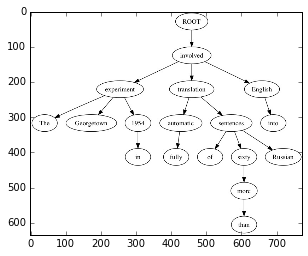

In [113]:
from xml.etree import ElementTree

tree = ElementTree.parse("data/nlp.txt.xml") 
root = tree.getroot() 

sentences = []
dependencies = []

for sentence in root[0][0]:
    for dep in sentence[3]:
      if dep[1].text != "." and dep[1].text != ",":
        dependencies.append([dep[0].text,dep[1].text])
    sentences.append(dependencies)
    dependencies = []
    
edges = sentences[5]
g=pydot.graph_from_edges(edges, directed=True)

g.write_jpeg('data/nlp_57.jpg', prog='dot')
im = Image.open("data/nlp_57.jpg")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

## 58. タプルの抽出

In [133]:
tree = ElementTree.parse("data/nlp.txt.xml")
root = tree.getroot() 

sentences = []
dependencies = []
depnsubj = []
depdobj = []

for sentence in root[0][0]:
    for dep in sentence[3]:
        deptype = dep.attrib
        
        if deptype["type"] == "nsubj":
            gidx = dep[0].attrib
            didx = dep[1].attrib
            dependencies.append([deptype["type"],gidx["idx"],dep[0].text,didx["idx"],dep[1].text])
        
        if deptype["type"] == "dobj":
            gidx = dep[0].attrib
            didx = dep[1].attrib
            dependencies.append([deptype["type"],gidx["idx"],dep[0].text,didx["idx"],dep[1].text])
        
    sentences.append(dependencies)
    dependencies = []
    
for dependence in sentences:
    for dep in dependence:
        if dep[0] == "nsubj":
            nsubj = dep[1]
            for dobj in dependence:
                if dobj[0] == "dobj" and dobj[1] == nsubj:
                    print('主語:'+dep[4],"\t",'述語:'+dep[2],end="\t")
                    print('目的語:'+dobj[4])
                    nsubj = 0

主語:understanding 	 述語:enabling	目的語:computers
主語:others 	 述語:involve	目的語:generation
主語:Turing 	 述語:published	目的語:article
主語:experiment 	 述語:involved	目的語:translation
主語:ELIZA 	 述語:provided	目的語:interaction
主語:patient 	 述語:exceeded	目的語:base
主語:ELIZA 	 述語:provide	目的語:response
主語:which 	 述語:structured	目的語:information
主語:underpinnings 	 述語:discouraged	目的語:sort
主語:that 	 述語:underlies	目的語:approach
主語:Some 	 述語:produced	目的語:systems
主語:which 	 述語:make	目的語:decisions
主語:systems 	 述語:rely	目的語:which
主語:that 	 述語:contains	目的語:errors
主語:implementations 	 述語:involved	目的語:coding
主語:algorithms 	 述語:take	目的語:set
主語:Some 	 述語:produced	目的語:systems
主語:which 	 述語:make	目的語:decisions
主語:models 	 述語:have	目的語:advantage
主語:they 	 述語:express	目的語:certainty
主語:Systems 	 述語:have	目的語:advantages
主語:Automatic 	 述語:make	目的語:use
主語:that 	 述語:make	目的語:decisions


## 59. S式の解析

In [140]:
tree = ElementTree.parse("data/nlp.txt.xml") 
root = tree.getroot() 

sentences = []

for sentence in root[0][0]:
    perse = re.sub(r'\)', r' )', sentence[1].text)
    perse = re.sub(r'\(', r'( ', perse)
    tokens = re.split(" ", perse)
    sentences.append(tokens)

n = 0
RBcounter = 0
for perse in sentences:
    for token in perse:
        NPtokenlist = []
        if token == "NP":
            NPlist = perse[n+1:]
            for NPtoken in NPlist:
                if NPtoken == "(":
                    RBcounter += 1
                if NPtoken == ")":
                    RBcounter -= 1
                if RBcounter == -1:
                    print("")
                    break
                NPtokenlist.append(NPtoken)
            LRBflag = 0
            for NPtoken in NPtokenlist:
                if NPtoken == ")":
                    continue
                if NPtoken == "(":
                    LRBflag = 1
                    continue
                if NPtoken != "(" and LRBflag == 1:
                    LRBflag -= 1
                else:
                    if NPtoken == "-LRB-":
                        print("(", end=" ")
                    elif NPtoken == "-RRB-":
                        print(")", end=" ")
                    else:
                        print(NPtoken, end=" ")        
            RBcounter = 0 
        n += 1
    print("")
    n = 0


Natural language processing 
Wikipedia 
the free encyclopedia Natural language processing ( NLP ) 
the free encyclopedia Natural language processing 
NLP 
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human ( natural ) languages 
a field of computer science 
a field 
computer science 
artificial intelligence 
linguistics concerned with the interactions between computers and human ( natural ) languages 
linguistics 
the interactions between computers and human ( natural ) languages 
the interactions 
computers and human ( natural ) languages 
computers 
human ( natural ) languages 

such 
NLP 
the area of humani-computer interaction 
the area 
humani-computer interaction 

Many challenges in NLP 
Many challenges 
NLP 
natural language understanding , that is , 
natural language understanding 
computers 
meaning 
human or natural language input 
others 
natural language generation 

History The history of NL